Loading package

In [1]:
import os
import scanpy as sc
import torch
from sklearn.decomposition import PCA
import anndata as ad

In [2]:
import MultiSP

Loading data

In [3]:
adata_RNA=ad.read_h5ad('data/human lymph node adata_RNA.h5ad')
adata_Protein=ad.read_h5ad('data/human lymph node adata_ADT.h5ad')

adata_RNA.var_names_make_unique()
adata_Protein.var_names_make_unique()
print(adata_RNA)
print(adata_Protein)

AnnData object with n_obs × n_vars = 3484 × 18085
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
AnnData object with n_obs × n_vars = 3484 × 31
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'


/home/mocf/anaconda3/envs/pytorch/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/mocf/anaconda3/envs/pytorch/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
data={'adata_omics1':adata_RNA,
      'adata_omics2':adata_Protein
      }
from MultiSP.utils import set_seed
set_seed(42)

# the location of R, which is required for the 'mclust' algorithm. Please replace the path below with local R installation path
os.environ['R_HOME'] = '/scbio4/tools/R/R-4.3.1_openblas/R-4.3.1'

Loading MultiSP Model

In [5]:
from MultiSP.model import MultiSP
model=MultiSP(
      data=data,
      device=device,
      modality_type='RNA and Protein'
)

Training the model

In [6]:
adata_omic1,adata_omic2=model.train()

100%|██████████| 50/50 [00:09<00:00,  5.37it/s]


In [7]:
#clustering
from MultiSP.utils import clustering
adata=adata_omic1.copy()
adata=clustering(adata,6,n_comps=20)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


Visualization

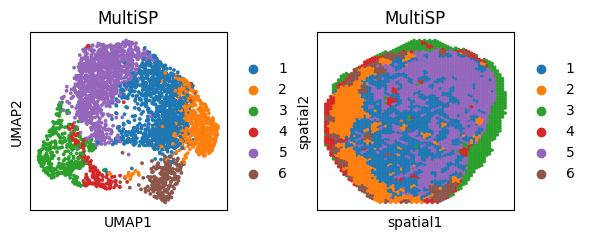

In [8]:
# visualization
import matplotlib.pyplot as plt
fig, ax_list = plt.subplots(1, 2, figsize=(6, 2.5))
sc.pp.neighbors(adata, use_rep='MultiSP_latent',n_neighbors=20)
sc.tl.umap(adata)

sc.pl.umap(adata, color='MultiSP', ax=ax_list[0], title='MultiSP', s=30, show=False,wspace=0.5)
sc.pl.embedding(adata, basis='spatial', color='MultiSP', ax=ax_list[1], title='MultiSP', s=25, show=False)

plt.tight_layout(w_pad=0.3)
plt.show()